In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("customer_churn_data.csv")

In [4]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [5]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [53]:
# in the above we called info so we could have an overview of the dataset
# We could see from the above that we have 703 non-null values in InternetServices
# If we are not going to include InternetService in our modeling sides, 
# we don't need to drop the 300 data points
# so instead of dropping the NA values and dropping the my dataset sides
# We're going to fill the NA values with something similar

In [7]:
df.isna().sum().sum()

np.int64(297)

In [18]:
# now we will call the InternetService

In [8]:
df["InternetService"] = df["InternetService"].fillna("")

In [9]:
df.isna().sum().sum()

np.int64(0)

In [58]:
# since we didn't have any NA values in our datasets
# So we don't need to drop any kind of NA values

In [60]:
# Next we will call the data frame head again to check for duplicates

In [10]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [63]:
# From the above we could deduce that we do not have duplicates
# However let us sum it all to be sure

In [12]:
df.duplicated().sum()

np.int64(0)

In [65]:
# obviously there is no duplicate so, we don't get to do something like drop duplicates

In [66]:
# Next we will call the data head to check for the numerical summary

In [13]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [68]:
# From the above, we could see, we have customer ID, Age,Tenure,Monthly charges,Total Charges
# in Age we could see that we have a minimum of 44, standard deviation is 9
# The minimum age is 12 and the maximum age is 83
# From the Tenure side, we can see that the mean Tenure is 18 and the minimum is 0
# the maximum is 122

In [69]:
# Let's us explore the correlations between these values

In [14]:
numeric_columns_data = df.select_dtypes( include= ["number"])

In [15]:
numeric_columns_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [72]:
# Now let us call the correlation so that we can see how they correlate

In [16]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [ ]:
-1                           1
strong negative          strong positive

In [11]:
# For a quick recap
# Correlations values will be -1 and 1
# 1 means strong positive relationship, while -1 means strong negative relation
# -1                              1
# strong negative              strong positive
# for instance let's say you have age and Tenure, once age increases, Tenure is going to decrease
# You can also liken it to Age and Education, high age means more education

In [ ]:
# From our above data our correlation values are really low, 
# except Totalcharges is high, it correlated with Tenure
# Although it's not providing any insight
# However we can find the total charges buy multiplying Tenure with Monthly charges

In [ ]:
# Let's call the data again
# Let's do some data visualizations
# and some value counts

In [17]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


In [ ]:
# we will start by seeing the value counts on the churn

In [18]:
df["Churn"]

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Churn, Length: 1000, dtype: object

In [ ]:
# From the above we have seen the churn series, 
# now let's have the value counts


In [19]:
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [ ]:
# Now let's check the type if it series or not

In [20]:
type(df["Churn"].value_counts())

pandas.core.series.Series

In [ ]:
# From the above, we could see that we have the series

In [21]:
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [ ]:
# From the churn we could see the values
# Now let's us make some plots

In [22]:
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

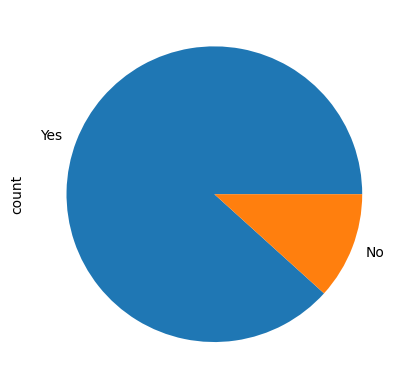

In [23]:
df["Churn"].value_counts().plot(kind="pie")

In [ ]:
# We could see that our pie chart has been created
# But we have the Y label ontop which is not neccessary and we don't have a title
# So let us create a titlle

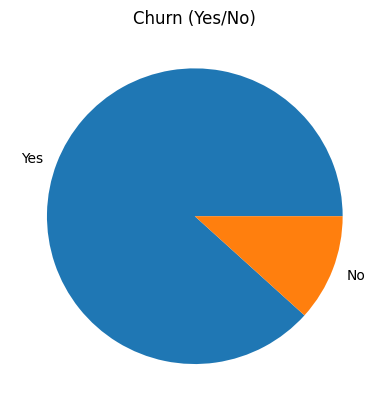

In [24]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn (Yes/No)")
plt.ylabel("")
plt.show()

In [ ]:
# Next step, let's group our data by churn

In [25]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [26]:
df.groupby("Churn")["MonthlyCharges"].mean()


Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [ ]:
# Let's add gender to the list

In [27]:
df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()


Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [28]:
# Let's explore the tenure size as well
df.groupby("Churn",)["Tenure"].mean()


Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [28]:
#Let's check the head of the data frame
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [29]:
# Now let's check the value of Age
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [30]:
 df.groupby("ContractType")["MonthlyCharges"].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

In [ ]:
# Now let's plot a plot from thi

<Axes: xlabel='ContractType'>

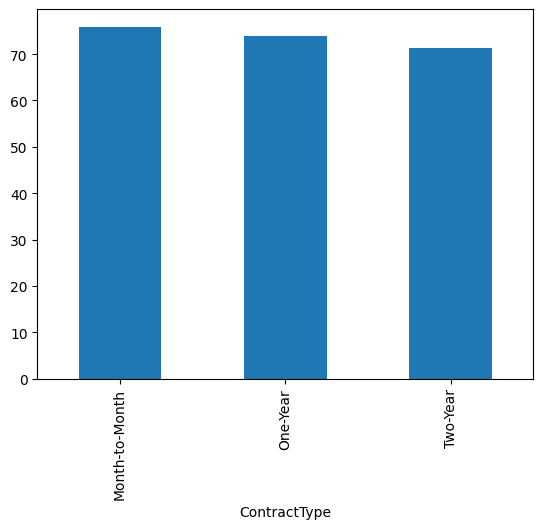

In [31]:
 df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")

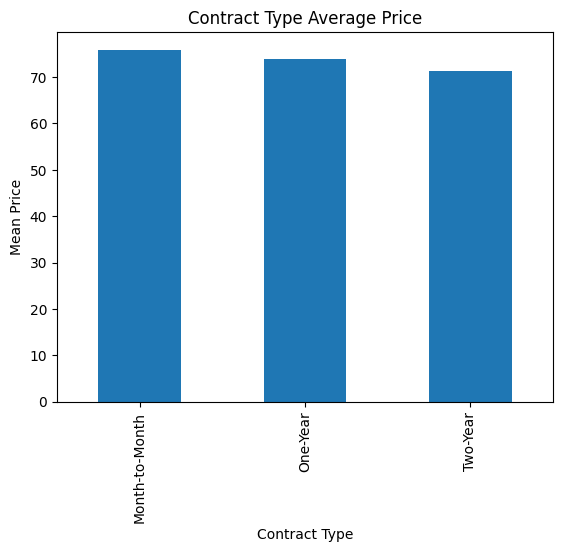

In [32]:
# Now let's change the Y label
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Price")
plt.show()

In [ ]:
# At the lower terms, we can see that the monthly charge average decreases

In [33]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [ ]:
# Let us now plot the histogram, to see the monthly chart histogram

(array([105.,  94., 105., 108.,  93., 104., 114.,  81., 108.,  88.]),
 array([ 30.   ,  38.996,  47.992,  56.988,  65.984,  74.98 ,  83.976,
         92.972, 101.968, 110.964, 119.96 ]),
 <BarContainer object of 10 artists>)

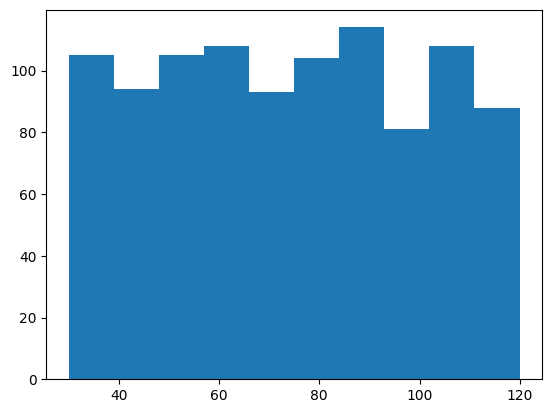

In [34]:
plt.hist(df["MonthlyCharges"])

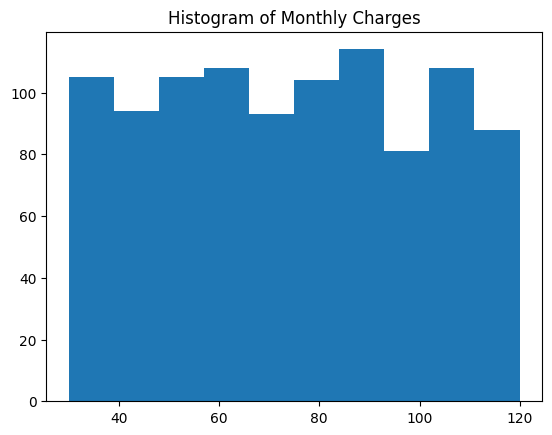

In [35]:
# We can add
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.show()

In [ ]:
# Also i'm currious about Tenure also, so let us view the chart

<function matplotlib.pyplot.show(close=None, block=None)>

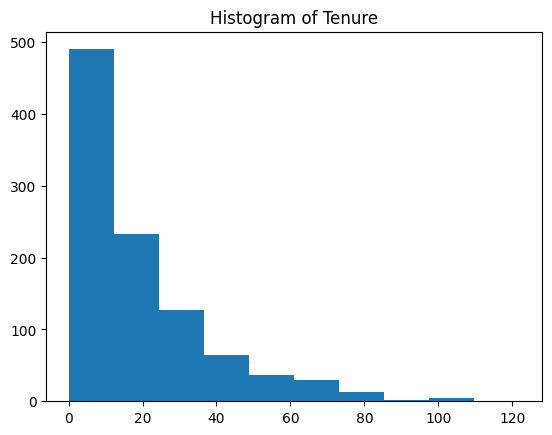

In [36]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.show

In [37]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


In [ ]:
# Now let's start the feature engineering side, let us take a quick recap of what we have done 
# We started by loading our data and checked for duplicated modules
# Also we  took a look at the numeric summaries and the correlations
# We grouged by
# Then we created histograms

In [ ]:
# Now we are going to start to the modeling side by feature engineering
# We are going to select the columns that we are going to use on the models

In [38]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [39]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [ ]:
# Let us set y to be our churn 
# And in the x side we are going to have Age, gender, tenure etc(these are our predictors)
# We are going to use them to predict

In [40]:
y = df[["Churn"]]
X = df[["Age","Gender","Tenure","MonthlyCharges"]]

In [41]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [41]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [ ]:
# Next up, we need numeric values for modeling, for both x and y
# We are going to start with the gender
# We will set x=1 female, while 0=male

In [42]:
X #1 Female 0 Male

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [ ]:
# We will use lamda for creating the 1 line function

In [43]:
X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

0      0
1      0
2      1
3      1
4      0
      ..
995    0
996    0
997    1
998    0
999    0
Name: Gender, Length: 1000, dtype: int64

In [ ]:
# Since we have modified our Gender column to numeric, let us assign x to represent gender
# so that when we call x we can have our newly devised numeric gender

In [44]:
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3364\2388402656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [45]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [46]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [ ]:
# Now we can see that we values in the Gender columns are in zeros and ones
# Now let us check a random number of our gender column to know the kind of data set it is

In [47]:
type(X["Gender"][0])

numpy.int64

In [ ]:
# From the above we could see that it is an integer


In [48]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3364\3691775968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


In [49]:
 type(y["Churn"][0])

numpy.int64

In [50]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [51]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [ ]:
# Now from the above, we can see that we have our y and X ready
# What we are going to do now, is to train test split for for the model

In [52]:
!pip install scikit-learn

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# so from the above we can see that
# X-train and y_train is our training set
# while X_test and y_test is our testing set
# which means we are going to train our model with X_train and y_train
# and we will compare our model with X_test and y_test

In [54]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)

In [58]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [59]:
X_test = scaler.fit_transform(X_test)

In [60]:
X_train

array([[ 0.1546439 ,  0.92528293, -0.64871466,  0.81973861],
       [ 1.79597221,  0.92528293, -0.7006326 ,  0.25157538],
       [ 0.1546439 ,  0.92528293, -0.7006326 ,  0.21856049],
       ...,
       [ 0.56497598, -1.08075052, -1.01214023, -0.9477097 ],
       [ 0.97530805, -1.08075052,  4.23157167, -0.75192373],
       [ 0.25722692,  0.92528293, -0.85638642,  1.5264876 ]],
      shape=(800, 4))

In [61]:
X_test

array([[ 0.54187999,  0.92295821,  0.01528362, -1.11922993],
       [-0.88556476,  0.92295821,  2.72123659,  1.72625334],
       [ 0.10266622,  0.92295821, -0.73636998,  1.25969099],
       [-0.44635099,  0.92295821, -0.68625974, -0.84687318],
       [ 0.3222731 ,  0.92295821, -0.68625974, -0.94886043],
       [-1.54438542,  0.92295821,  0.46627578, -0.03800881],
       [-0.77576132, -1.08347268,  0.76693722, -1.68035517],
       [ 1.42030753, -1.08347268,  0.31594506, -1.03287291],
       [-1.21497509,  0.92295821, -0.73636998, -1.01411664],
       [-1.10517165,  0.92295821, -0.93681094,  0.03349949],
       [-0.77576132,  0.92295821,  0.31594506,  0.87714112],
       [-0.22674411, -1.08347268, -0.98692118, -1.08406192],
       [-1.7639923 , -1.08347268, -0.3855983 , -0.42094943],
       [ 0.3222731 , -1.08347268,  0.31594506, -1.39862028],
       [ 0.43207655,  0.92295821, -0.93681094, -0.54286522],
       [-0.66595788,  0.92295821,  0.66671674,  1.06587614],
       [-0.9953682 , -1.

In [ ]:
 # Next thing we are going to do is build our classification model
# We are also going to define the fuction for getting the model

In [61]:
from sklearn.metrics import accuracy_score
def modelperfomance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test, predictions)))

In [62]:
from sklearn.model_selection import GridSearchCV

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log_model = LogisticRegression()

In [ ]:
# we are going to train our model using

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# Now we have our model trained right now
# Next up we will make predictions using

In [69]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [70]:
y_pred = log_model.predict(X_test)

In [71]:
y_test

,Churn
194,1
87,1
75,1
957,1
274,1
...,...
428,1
752,1
781,1
376,0


In [72]:
modelperfomance(y_pred)

Accuracy score on model is 0.905


In [73]:
# Now we have our y model predictions

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
param_grid = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform","distance"],
}

In [75]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv= 5 )

In [76]:
gridkn.fit(X_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [77]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [78]:
y_pred = gridkn.predict(X_test)

In [79]:
modelperfomance(y_pred)

Accuracy score on model is 0.905


In [80]:
from sklearn.svm import SVC

In [81]:
svm = SVC()

In [82]:
param_grid = {
    "C" :[0.01,0.1,0.5,1],
    "kernel" : ["linear","rbf","poly"]
}

In [83]:
gridsvc = GridSearchCV(svm, param_grid, cv = 5)

In [84]:
gridsvc.fit(X_train, y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [85]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [86]:
y_pred = gridsvc.predict(X_test)

In [87]:
modelperfomance(y_pred)

Accuracy score on model is 0.91


In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
param_grid = {
    "criterion" : ["gini","entropy"],
    "splitter": ["best","random"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [90]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [91]:
grid_tree.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [92]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [93]:
y_pred = grid_tree.predict(X_test)

In [94]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1])

In [96]:
modelperfomance(y_pred)

Accuracy score on model is 0.845


In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [98]:
param_grid = {
    "n_estimators" : [32,64,128,256],
    "max_features" : [2,3,4],
    "bootstrap" : [True, False]
}

In [99]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv= 5)

In [100]:
grid_rfc.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,64


In [101]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [102]:
grid_rfc.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1])

In [103]:
modelperfomance(y_pred)

Accuracy score on model is 0.845


In [104]:
best_model = gridsvc.best_estimator_

In [105]:
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [106]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')

In [ ]:
# Summary
# We selected the Y and the X
# we encoded the categorical values
# We implied train_test_split with setting the test size to 0.2
# We scaled our data , after scaling our data 
# we imported joblib fo that we will not have data lickage
# we defined the fuctions for getting the accuracy score with the predictions fom the l models
# We trained the logistic model,  we got our results we trained the kneighbors classifier models
#The  support vector Classifier model
 # DecisionTreeClassifier model and Random Forest classifier model
# And the best model is the Support Vector Classifier Model, so we exported using joblib dump method.pkl
# Now we can continue